In [27]:
import glob
from nilearn import plotting
import numpy as np
import pandas as pd
from nilearn.glm.second_level import SecondLevelModel
from pathlib import Path

In [28]:
def grab_stat_files(dir:str):
    dir = dir
    # Get list of all .nii.gz files in the directory
    filepath = f'{dir}*-avgFz_map.nii.gz'
    files = glob.glob(filepath)
    # Separate files into HC and SCZ groups based on filename prefixes
    HC = []
    SCZ = []
    for f in files: 
        if f.split('/')[-1].startswith('0'):
            HC.append(f)
        if f.split('/')[-1].startswith('5'):
            SCZ.append(f)
    # Sort the lists to maintain consistent order
    return sorted(HC), sorted(SCZ)

contrast: contrast-1v0, thr: thr2.81
n HC, n SCZ: 33 24
design matrix rows: 57 n images: 57
   intercept  group
0          1      1
1          1      1
2          1      1
3          1      1
4          1      1


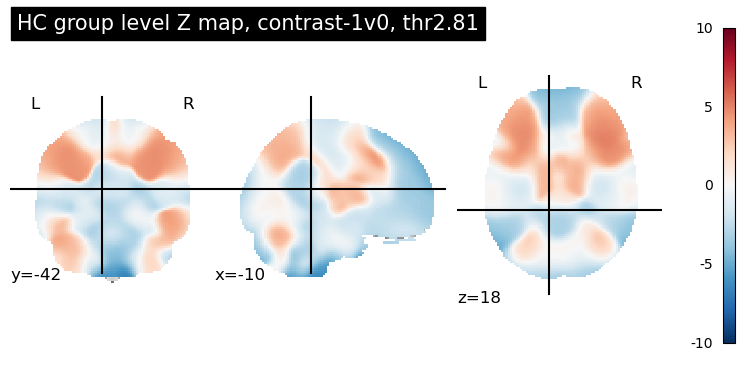

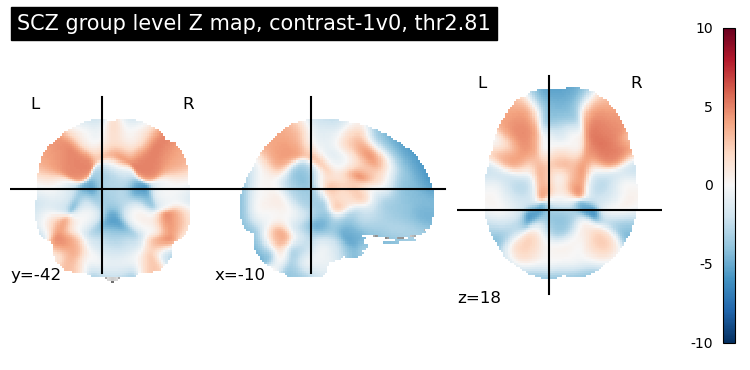

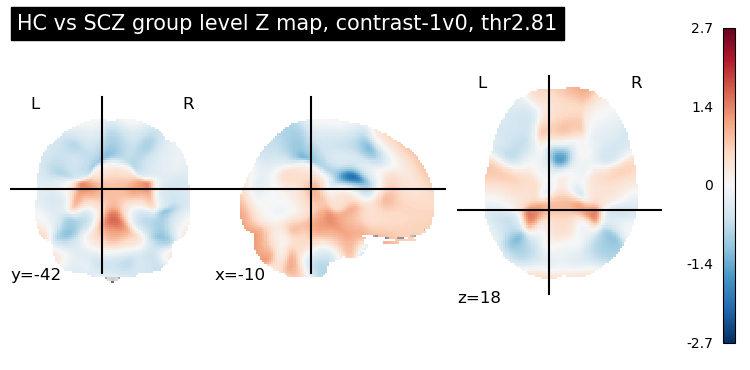

contrast: contrast-1v0, thr: thr3.29
n HC, n SCZ: 27 20
design matrix rows: 47 n images: 47
   intercept  group
0          1      1
1          1      1
2          1      1
3          1      1
4          1      1


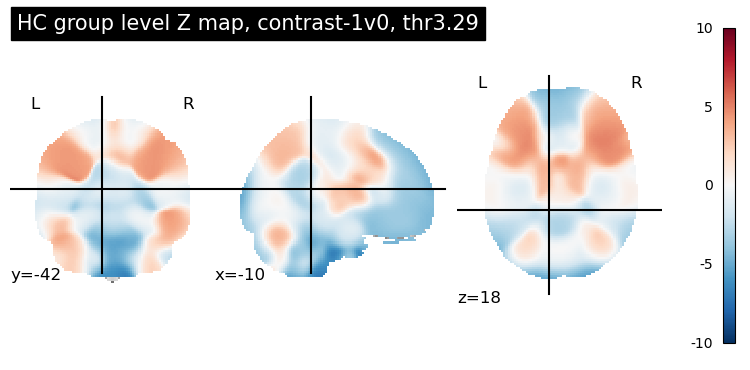

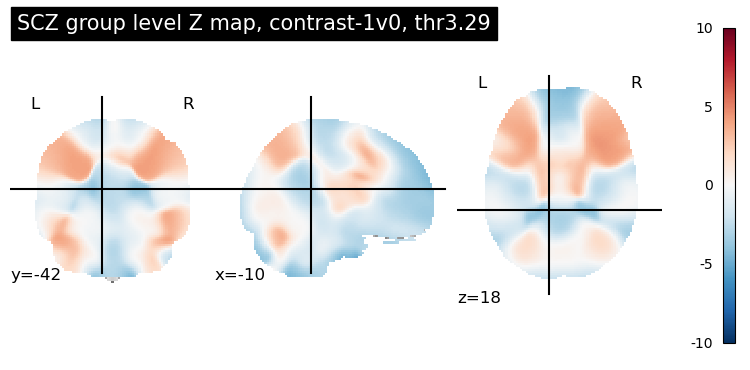

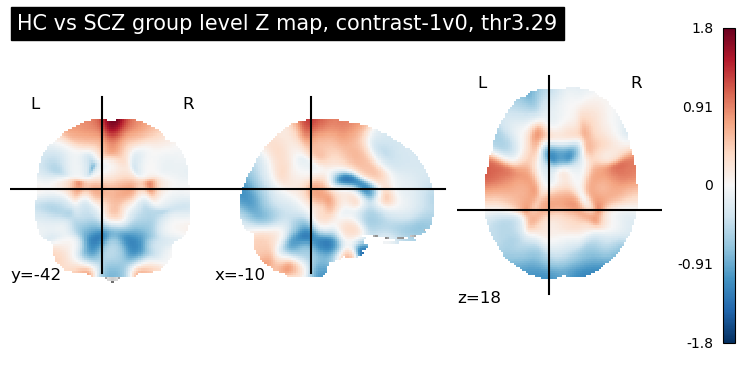

contrast: contrast-2v1, thr: thr2.81
n HC, n SCZ: 35 23
design matrix rows: 58 n images: 58
   intercept  group
0          1      1
1          1      1
2          1      1
3          1      1
4          1      1


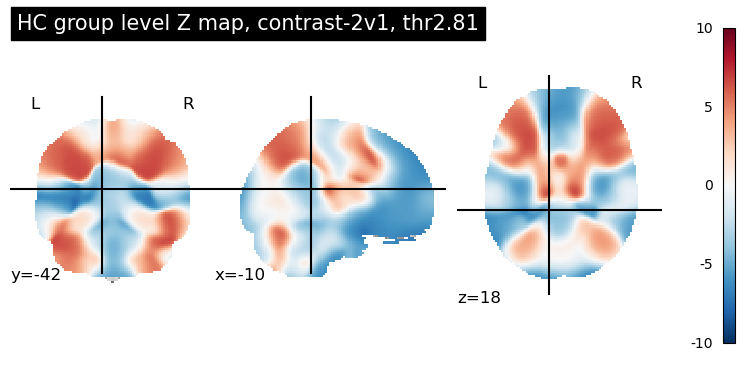

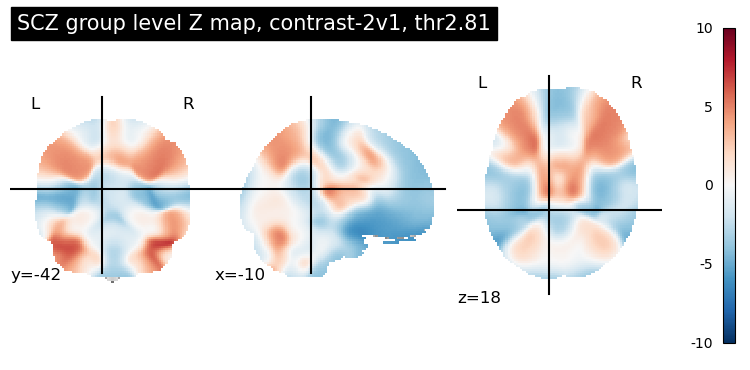

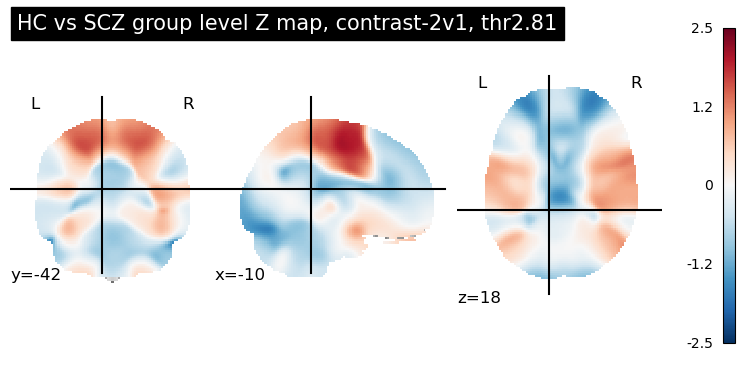

contrast: contrast-2v1, thr: thr3.29
n HC, n SCZ: 29 17
design matrix rows: 46 n images: 46
   intercept  group
0          1      1
1          1      1
2          1      1
3          1      1
4          1      1


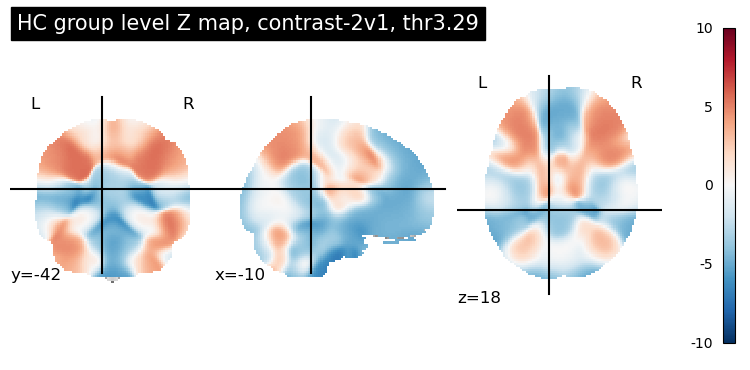

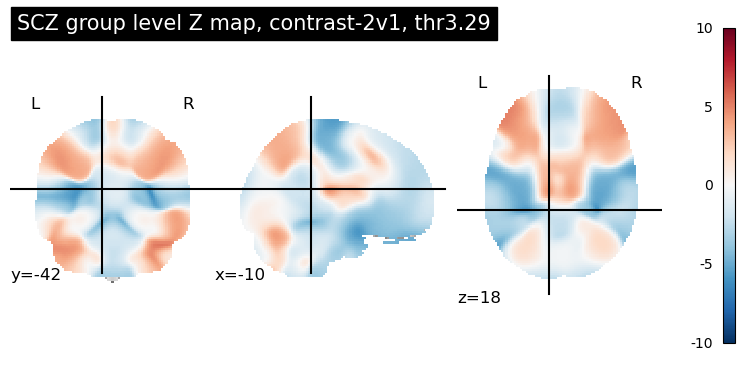

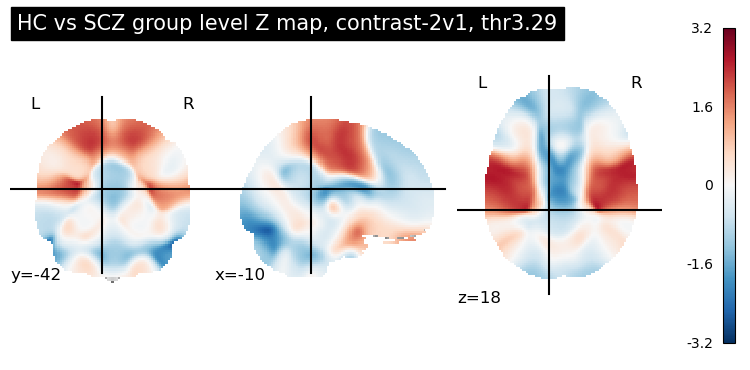

contrast: contrast-2v0, thr: thr2.81
n HC, n SCZ: 35 24
design matrix rows: 59 n images: 59
   intercept  group
0          1      1
1          1      1
2          1      1
3          1      1
4          1      1


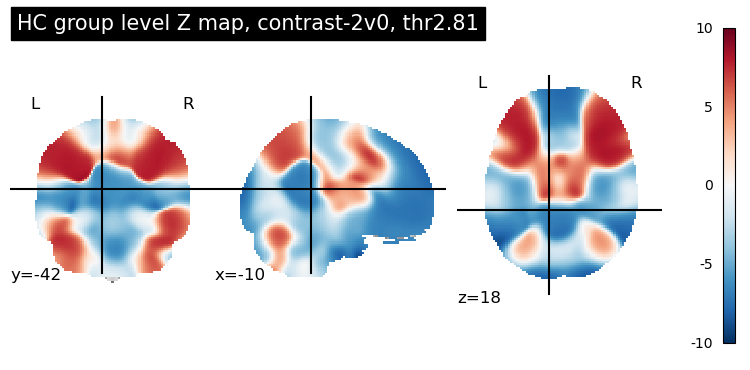

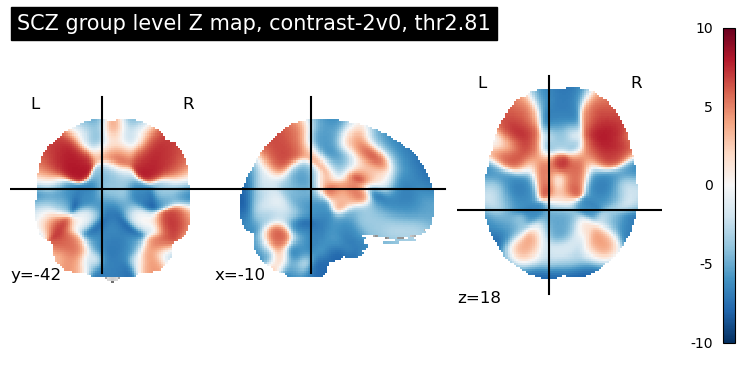

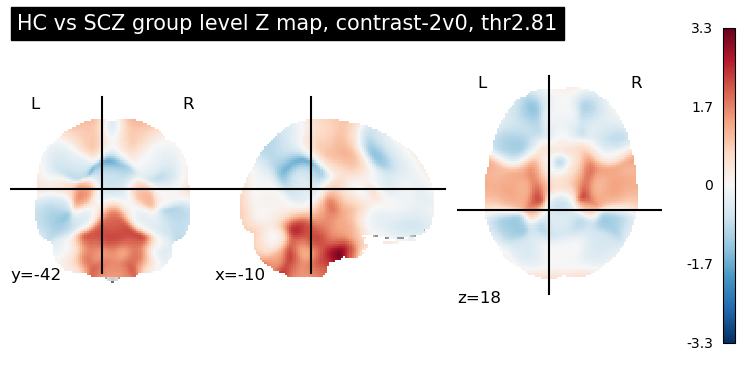

contrast: contrast-2v0, thr: thr3.29
n HC, n SCZ: 33 24
design matrix rows: 57 n images: 57
   intercept  group
0          1      1
1          1      1
2          1      1
3          1      1
4          1      1


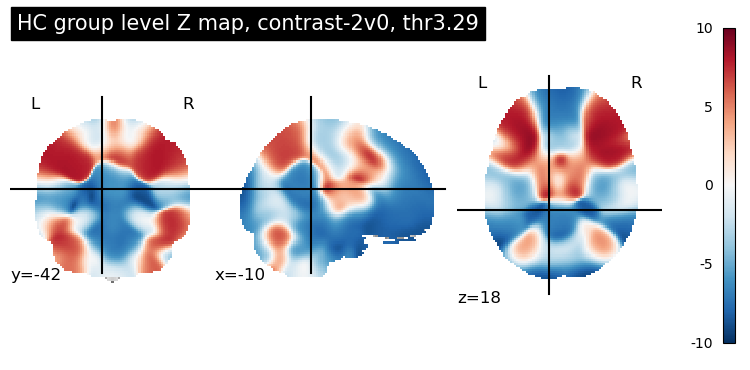

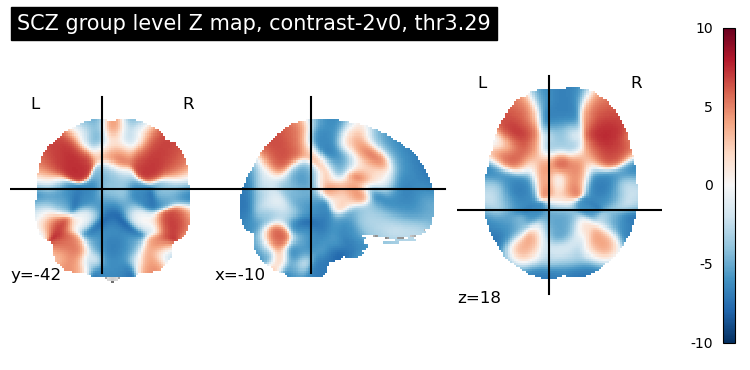

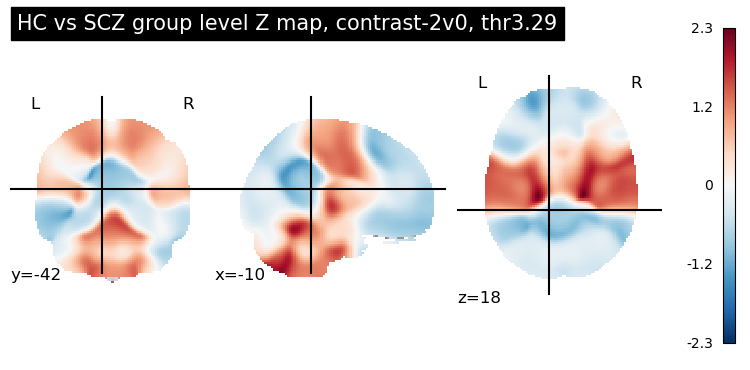

In [29]:
for c in ['contrast-1v0','contrast-2v1','contrast-2v0']:
    for thr in ['thr2.81','thr3.29']:
        thr_hc, thr_scz = grab_stat_files(f'/BICNAS2/tuominen/ANM_SCZ/anm_files/fz_maps/{c}/{thr}/Fz-maps/')
        
        # design matrices for current thresholded data
        design_matrix_HC = pd.DataFrame([1] * len(thr_hc), columns=["intercept"])
        design_matrix_SCZ = pd.DataFrame([1] * len(thr_scz), columns=["intercept"])

        # build group design matrix with explicit intercept + group columns
        group_effect = np.hstack((np.ones(len(thr_hc), dtype=int), np.zeros(len(thr_scz), dtype=int)))
        design_matrix_group = pd.DataFrame({
            "intercept": np.ones(len(group_effect), dtype=int),
            "group": group_effect
            })
        # Sanity prints
        print(f"contrast: {c}, thr: {thr}")
        print('n HC, n SCZ:', len(thr_hc), len(thr_scz))
        print('design matrix rows:', design_matrix_group.shape[0], 'n images:', len(thr_hc) + len(thr_scz))
        print(design_matrix_group.head())
        
        # HC model
        model_hc = SecondLevelModel(smoothing_fwhm=12.0)
        model_hc = model_hc.fit(thr_hc, design_matrix=design_matrix_HC)
        z_map_hc = model_hc.compute_contrast("intercept", output_type="z_score")
        display1 = plotting.plot_stat_map(
            z_map_hc,
            threshold=0  ,
            vmax=10,
            display_mode="ortho",
            cut_coords=[-10,-42,18],
            title=f"HC group level Z map, {c}, {thr}",
            ) 
        plotting.show()
        display1.savefig(f'/BICNAS2/tuominen/ANM_SCZ/figs2/{c}_HC_thr{thr}.png')
        
        # SCZ model
        model_scz = SecondLevelModel(smoothing_fwhm=12.0)
        model_scz = model_scz.fit(thr_scz, design_matrix=design_matrix_SCZ)
        z_map_scz = model_scz.compute_contrast("intercept", output_type="z_score")
        display2 = plotting.plot_stat_map(
            z_map_scz,
            threshold=0,
            vmax=10,
            display_mode="ortho",
            cut_coords=[-10,-42,18],
            title=f"SCZ group level Z map, {c}, {thr}",
        ) 
        plotting.show()
        display2.savefig(f'/BICNAS2/tuominen/ANM_SCZ/figs2/{c}_SCZ_thr{thr}.png')
        
        # Group comparison model
        model_group = SecondLevelModel(smoothing_fwhm=12.0)
        model_group = model_group.fit(thr_hc + thr_scz, design_matrix=design_matrix_group)
        z_map_group = model_group.compute_contrast("group", output_type="z_score")
        display3 = plotting.plot_stat_map(
            z_map_group,
            threshold=0,
            display_mode="ortho",
            cut_coords=[-10,-42,18],
            title=f"HC vs SCZ group level Z map, {c}, {thr}",
        ) 
        plotting.show()
        display3.savefig(f'/BICNAS2/tuominen/ANM_SCZ/figs2/{c}_HC_vs_SCZ_thr{thr}.png')
                
        